# Demonstration notebook

### Maximum observed magnitude assignment

Run the following cells to assign maximum magnitudes to each segment. This may take ca. 1 hr. 

**This requires the following data files:**
- data/feature_data.csv
- data/ghea.csv
- data/eq_data/filename.csv

For more details, please refer to the README file. 

In [1]:
cd subductionPCA/

/home/val22/subduction_data_analytics/subductionPCA


In [2]:
# uncomment this line to run the maximum magnitude assignment
# %run preprocessing.py

In [3]:
cd ..

/home/val22/subduction_data_analytics


### Define projection parameters

Run one of the following cells to define the Kernel-PCA projections as described in our study. 

Alternatively, adjust the parameters in the following cell as wanted. Supported inputs are: 
- scaler: `'StandardScaler'`, `'RobustScaler'`, `'MinMaxScaler'`
- kernel: 
    - `None` for linear PCA
    - `'rbf'`, `'cosine'`, `'linear'`, `'poly'`, `'sigmoid'` for Kernel-PCA
- gamma (for RBF Kernel-PCA): float number; default = $\frac{1}{no. features} = 0.25$ if all four features are included
- features: any combination of the four features: `'Sed_Thick'`, `'Dip'`, `'Vel'`, `'Rough'`

In [4]:
# Linear PCA:  

scaler = 'StandardScaler'
kernel = None 

params = {'scaler': scaler, 'kernel': kernel}

features = ['Sed_Thick', 'Dip', 'Vel', 'Rough']

In [5]:
# RBF Kernel-PCA 

scaler = 'StandardScaler'
kernel = 'rbf' 
gamma = None

params = {'scaler': scaler, 'kernel': kernel, 'gamma': gamma}

features = ['Sed_Thick', 'Dip', 'Vel', 'Rough']

In [6]:
# Cosine Kernel-PCA 

scaler = 'RobustScaler'
kernel = 'cosine' 
gamma = None 

params = {'scaler': scaler, 'kernel': kernel, 'gamma': gamma}

features = ['Sed_Thick', 'Dip', 'Vel', 'Rough']

### Running the projector and generating figures

Run the following cell to run the model and generate figures. This may take a few seconds. 

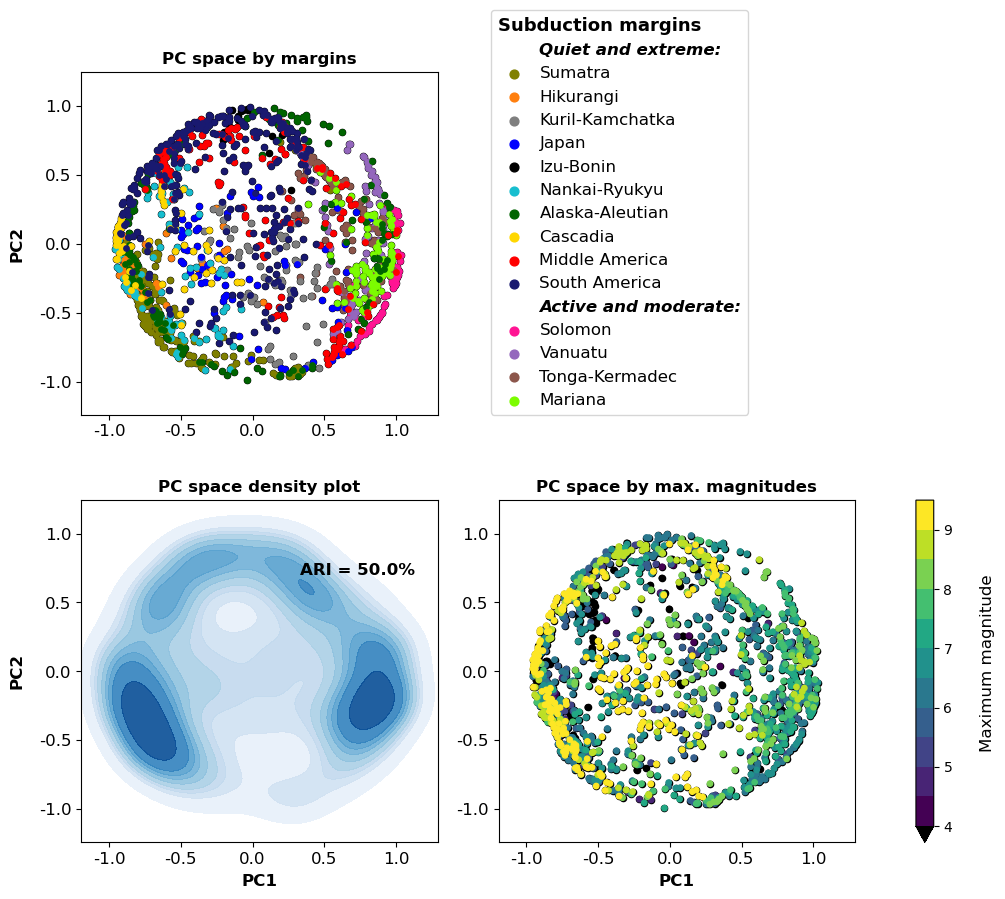

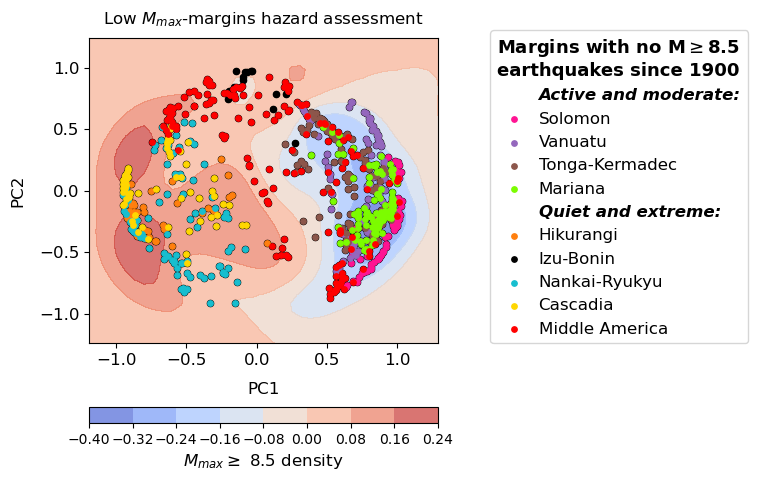

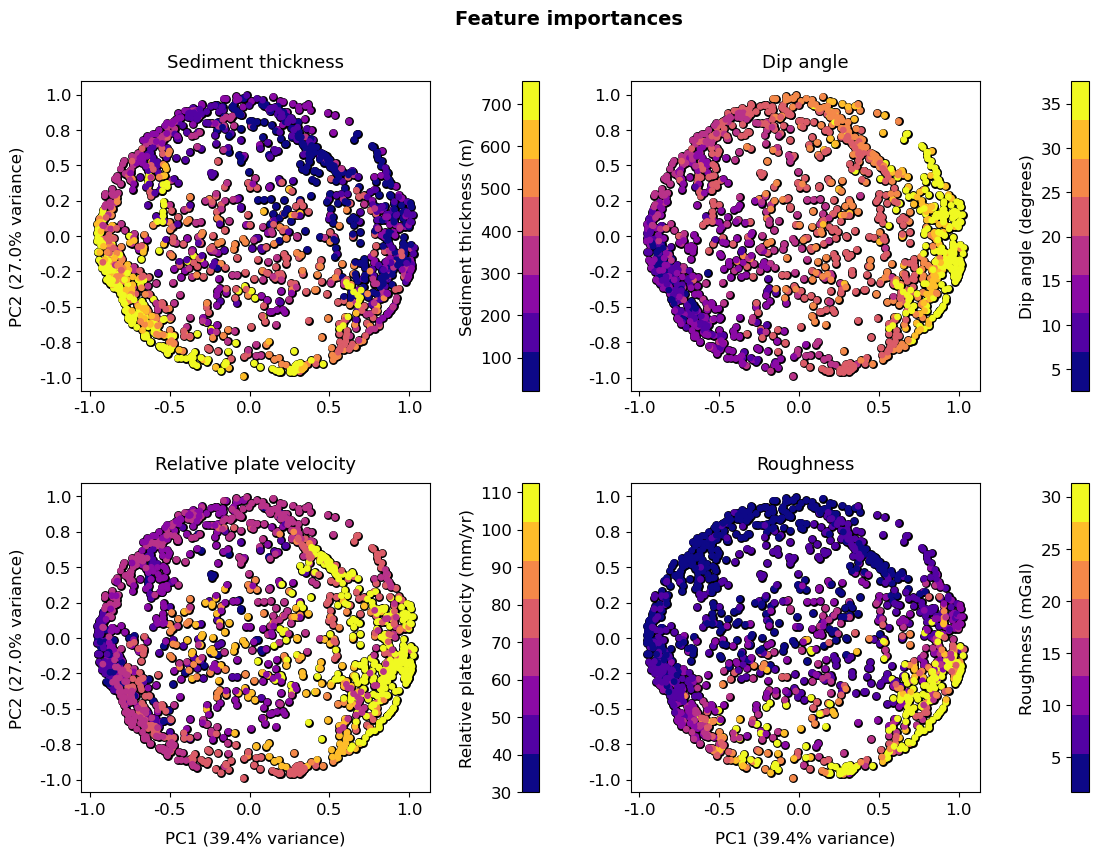

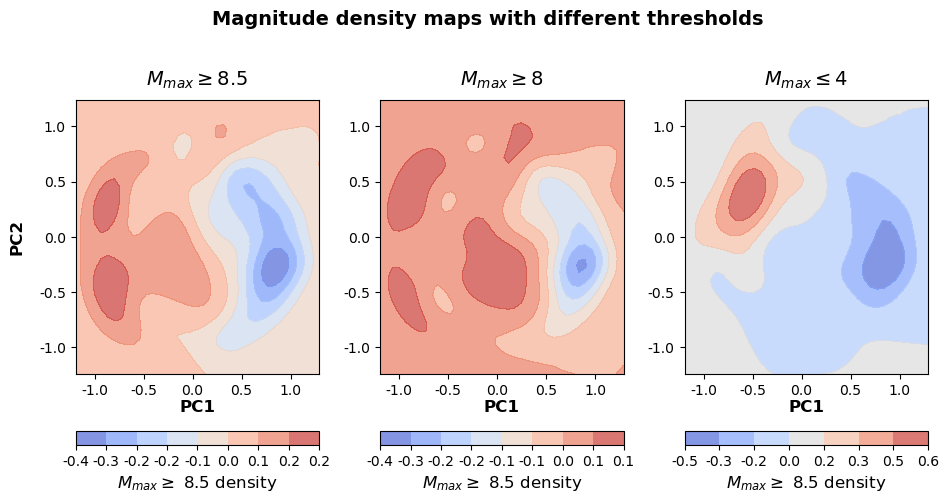

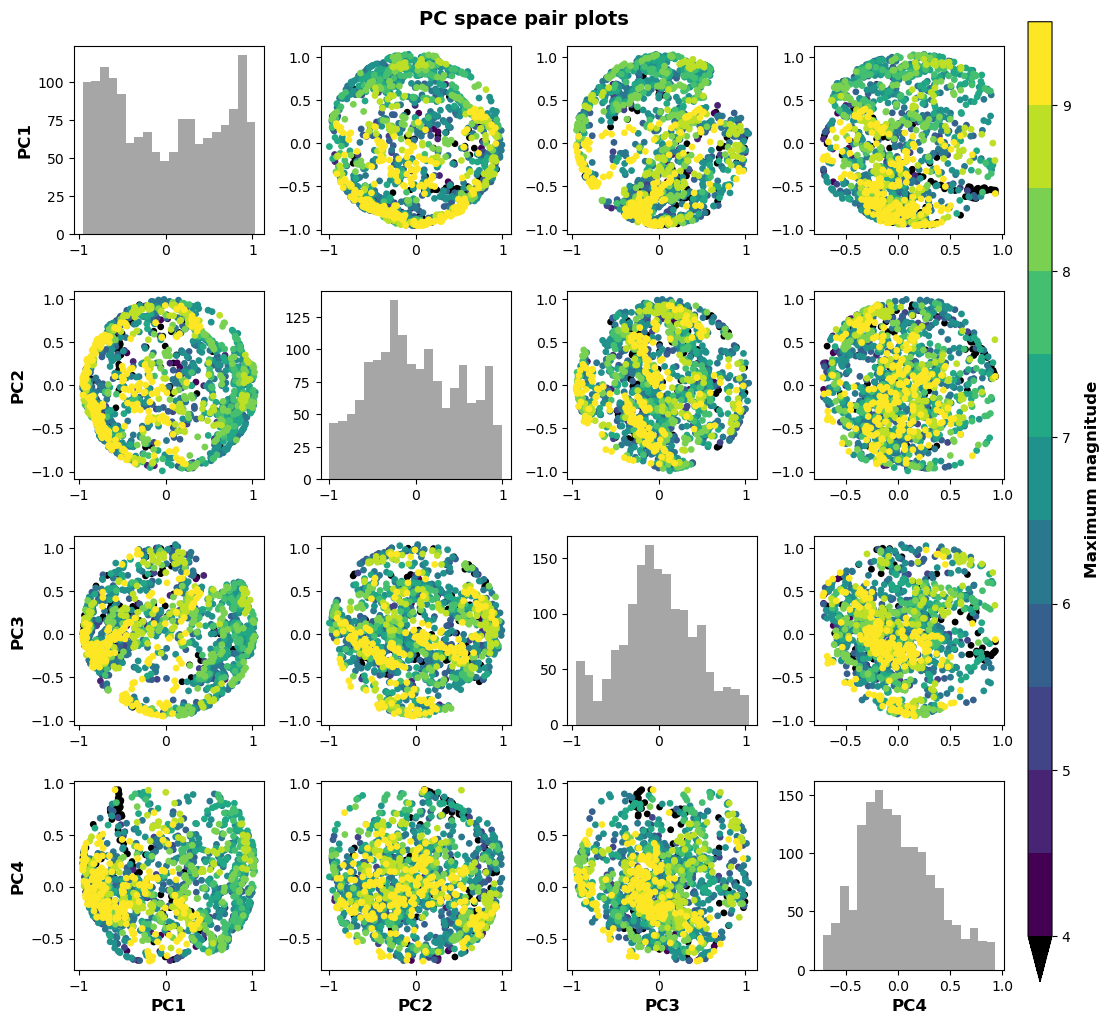

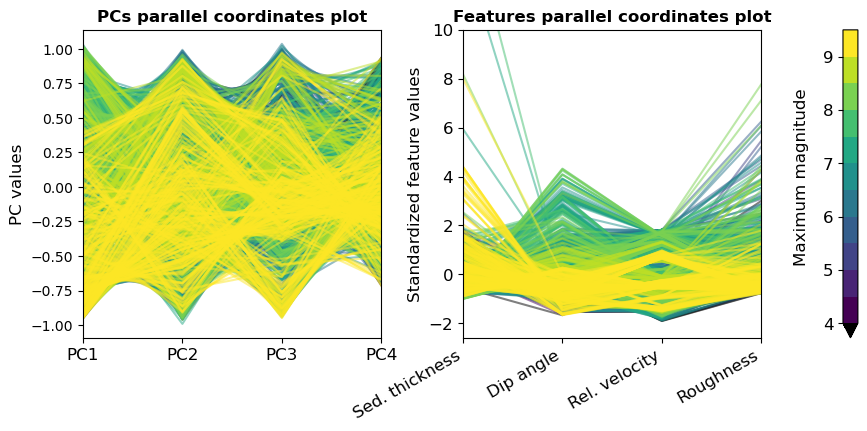

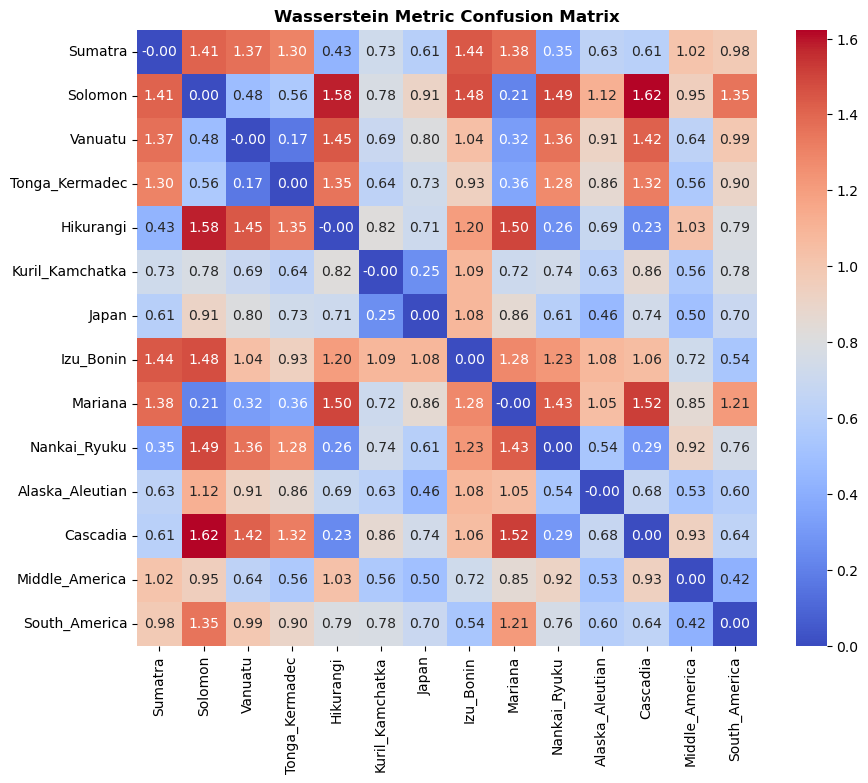

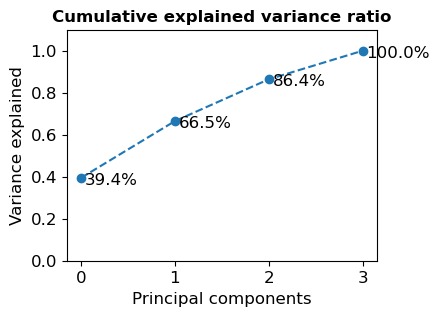

FeatureUnion(transformer_list=[('Feature processing',
                                ColumnTransformer(force_int_remainder_cols=False,
                                                  remainder='passthrough',
                                                  transformers=[('Imputer',
                                                                 SimpleImputer(),
                                                                 ['Sed_Thick',
                                                                  'Dip', 'Vel',
                                                                  'Rough'])])),
                               ('PCA projection',
                                Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(force_int_remainder_cols=False,
                                                                   transformers=[('Log. '
                                                                                  'Preprocessor',
                                                                                  Pipeline(steps=[('Imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('Log '
                                                                                                   'Transform',
                                                                                                   LogTransformer()),
                                                                                                  ('Scaler',
                                                                                                   RobustScaler())]),
                                                                                  ['Sed_Thick',
                                                                                   'Dip',
                                                                                   'Rough']),
                                                                                 ('Preprocessor',
                                                                                  Pipeline(steps=[('Imputer',
                                                                                                   SimpleImputer()),
                                                                                                  ('Scaler',
                                                                                                   RobustScaler())]),
                                                                                  ['Vel'])])),
                                                ('PCA',
                                                 KernelPCA(kernel='cosine',
                                                           n_components=4,
                                                           random_state=42))]))])

In [7]:
from subductionPCA.Projector import Projector

projector = Projector(params=params, features=features, generate_figures=True)

projector.get_projector()

In [11]:
from platform import python_version

print(python_version())

3.10.6
